# Stochastic Gradient Descent (SGD)

```{figure} ./images/sgd-meme.png
:align: center
:width: 400px
```
<!-- <img height="500px" src="./images/sgd-meme.png" alt="sgd meme" class="bg-primary mb-1" style="text-align:right" align="center"> -->

**Stochastic Gradient Descent** is an optimization algorithm that differs from the usual **Gradient Descent** in that the gradient of the function is considered at each step **not as the sum** of gradients from each point, but as the gradient from **one randomly** selected element

# Gradient Descent (GD) review
Before going into the study of stochastic gradient descent, let's recall the formula of ordinary gradient descent.
According to the (description)[#], the Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function.
We have the following:

* input points $x \in X (X = R^n) \;\;\;\text{i.e}\;\;\; x = (x_1, ..., x_n)^T$;
* $f(x)$ - differentiable multi-variable function

```{math}
:label: gd-math-formula
x_{k+1} = x{k} - \eta \nabla f(x)
```

where,  $\nabla f(x)$ is gradient determined here {eq}`vector-func-diff` <br>
$\;\;\;\;\;\;\;\;\; \eta$ - the learning rate or gradient step (responsible for how much to change in the direction of the gradient)


# Stochastic Gradient Descent (SGD)

## GD algorithm problem

Considering the previous algorithm {eq}`gd-math-formula` we come to the **problem**. To determine a new approximation of the vector pointt $x$, it is necessary to calculate the sum of the gradients for each point i.e. $ \sum\limits_{i=1}^l \nabla f(x_i)$ 
**HOWEVER** It can significantly slow down the algorithm since it is very resource - intensive. <br>
* $l$ - number of finite points (number of iterations)

## SGD derivation
In order to improve the efficiency of the algorithm we may **replace** standard calculation of the **real gradient** for the whole number of points with the **pseudogradient** for only one point or some sequence of points.

**Pseudogradient** ($\nabla \widehat f$) must have the following properties:
* It must form an **acute (sharp) angle** with a **true gradient** in the "n" dimensional space
* It must be **calculated much simpler** than the true gradient $\nabla f(x)$ over the points.

Accordingly, at each step, instead of calculating the whole sum of gradients  ($\sum\limits_{i=1}^l \nabla f(x_i)$) one observation can be considered ($\nabla f(x_j)$), i.e. 
```{math}
:label: sgd-math-formula
\mathbb x_{k+1} = \mathbb x_k - \eta  \nabla f(\mathbb x_k)
```

 

where, $ 1\leqslant k \leqslant l$ (usually random object from the trainig sample)

## SGD Realization Pseudocode

* Input: Training sample $X^{l}$, convergence step (learning rate) "**$\eta$**", rate of "forgetting" "*$\lambda$*"
* Output: Vector of weight coefficients $w$

Algorithm:
1. Initialization of weights "$w$" with some initial values 
2. Initial calculation of the cost function: $(\widehat Q (w) = \frac 1l\sum\limits_{i=1}^l L_i(w))$

3. Loop
3. Choose random observation $ x_k \in \mathbb X^{l}$
3. Calculate loss function $E_k = L_k(w)$
3. Recalculate weight vector: $w = w - \eta  \nabla L_k(w)$
3. Recalculate cost function:  $\widehat Q = \lambda E_k + (1-\lambda)\widehat Q$

4. While $\widehat Q$ and/or **$w$** don't reach set values

## Heuristics

According to the [description](https://en.wikipedia.org/wiki/Heuristic),  "**heuristics**" is understood as a set of techniques as well as the methods that facilitate and simplify the solution of corresponded tasks. Here is the list of suggested heuristics during the work with the SGD algorithm:
* Initialization of the weights
* Choice for learning rate also known as convergence step or gradient step
* Choice of the object from the training sample

### Initialization of weights $w$
One of the crucial steps during SGD algorithm is initialization of the weights. It is common to set **zero vector** as initial values, but there are also other approaches.
1. So, w = 0;

Another way is take **small random weights**, since if initialize large initial weight values it can lead to an area with small modulo derivatives and therefore it will be difficult to get out of such an area.

2. So, $w_j$ = random($-\frac 1{2n}$, $\frac 1{2n}$)

Third case is just to launch SGD several times with **various initial approaches** and select the best solution.

3. So, $w = {[C_1, C_2, ..., C_n]}^{T}$, where $C_1, C_2, C_n$ - are some initial values


### Dynamic Learning Rate
As an optimization, **learning rate variable $\eta$** value can be **dynamicly changed** at each step of iteration. Replacing **$\eta$** with a time-dependent learning rate **$\eta(t)$** increase the complexity of controlling convergence of an optimization algorithm. In particular, it is required to figure out how rapidly should decay. There is a list of some commonly used formulas for **$\eta(t)$** calculation.

$$ \eta(t)=\eta_i \;\;\text{ if }\;\; t_i \leqslant t < t_{i+1} $$
$$\eta(t)=\eta_o \cdot e^{-\lambda t}, \;\;\text{exponential decay}\;\;$$
$$\eta(t)=\eta_o \cdot (\beta t + 1)^{-\alpha}, \;\;\text{polynomial decay}\;\;$$

```{note}

If $\eta(t)$ changes **too quick**, then **stop optimizing** prematurely. If we decrease it **too slowly**, we **waste** too much **time** on optimization. 

```

### Sample object choice
As far as the random object choice is concerned from the training sample, the following heuristics can be used:
* Take objects from different classes;
* Take objects on which the smaller the margin (more probability to take desired object)

```{note}

$**Margin** (M_i)$ is the distance from the separating surface to i-th object i.e. the margin of the sample $(x_i, y_i) is$
$$M_i = a(x_i) \cdot y_i = <w, x_i> y_i$$
if the value is **positive**, then the prediction if **correct**.

```





## Advantages and Disadvantages

## SGD with notMNIST

In [1]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from numpy import ndarray
from notMNIST import (
    plot_letters,
    plot_confusion_matrix,
    X_test,
    y_test,
    X_train,
    y_train,
)


clf: SGDClassifier = SGDClassifier(
    penalty="l2",
    alpha=0.0001,
    learning_rate="optimal",
    eta0=0,
    shuffle=True,
    max_iter=3000
)
model: SGDClassifier = clf.fit(X=X_train, y=y_train)
y_train_pred: ndarray = model.predict(X=X_train)
y_test_pred: ndarray = model.predict(X=X_test)
train_accuracy: float = accuracy_score(y_train, y_train_pred)
test_accuracy: float = accuracy_score(y_test, y_test_pred)
print(f"SGD accuracy train: {train_accuracy* 100:.2f}%")
print(f"SGD accuracy test: {test_accuracy* 100:.2f}%")

Parsing...


Done


SGD accuracy train: 99.62%
SGD accuracy test: 95.21%


### Visualize data results

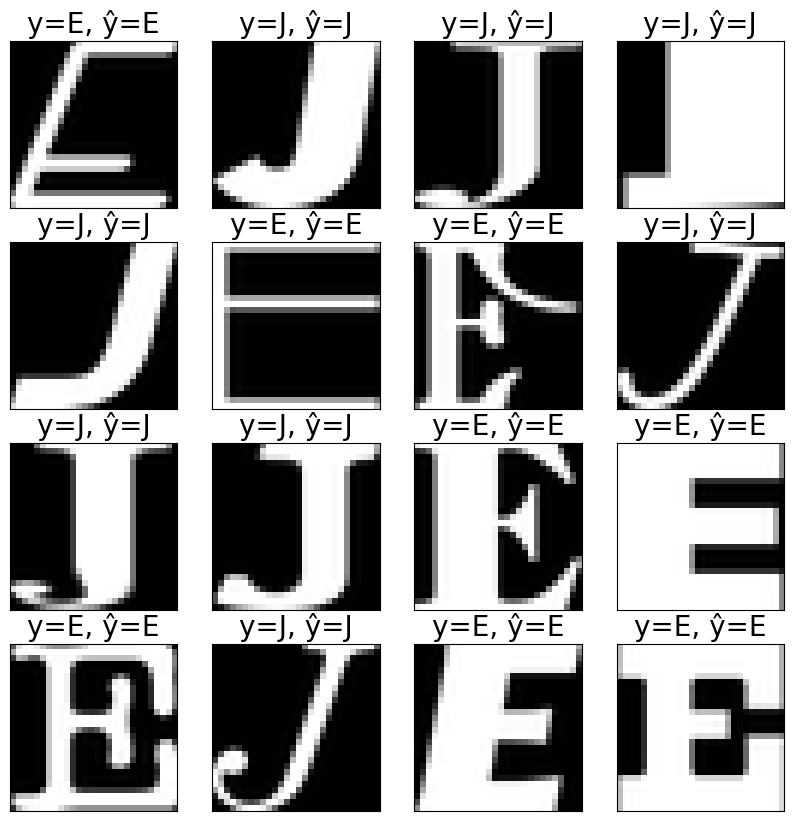

In [2]:
plot_letters(X_test, y_test, y_test_pred, random_state=912)

### Visualize performance

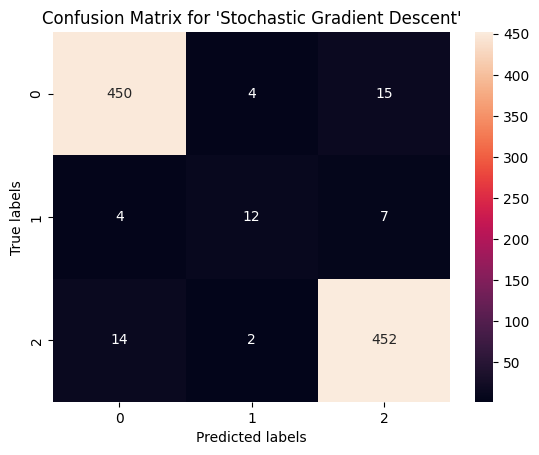

In [3]:
plot_confusion_matrix(
    y_test=y_test,
    y_test_pred=y_test_pred,
    model_name="Stochastic Gradient Descent"
)

## Optimizers of Gradient Algorithms

The main disadvantage of gradient algorithms is getting stuck in local optima (minimum).

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/1200px-Extrema_example_original.svg.png
:align: center
```

Moreover, at **such points, the derivative is zero**, which means that the further change of weights according to the formula {eq}`sgd-formula` ( $\nabla Q(w^{(t)}) = \nabla L_k(w^t, x_k)$ = 0 ) will not happen (we will stuck). <br>


In addition, stochastic gradient algorithms can form **strong fluctuations** when moving to the minimum point of the function
```{figure} ./images/sgd-fluctuations.png
:align: center
```

For solving above problems there were dedicated several solutions. See below

### Momentum Gradient Descent

```{figure} ./images/momentum-meme.png
:align: center
:width: 400px
```

It was proposed to average the gradient in steps using an exponential moving average i.e. using the formula:

```{math}
:label: momentum-formula
v = \gamma v + (1-\gamma)\eta_t \cdot \nabla Q(w^{(t)})
```

where, $v$ - exponential moving average i.e some variable that accumulates the average of the gradients <br>
$\;\;\;\;\;\;\;\;\;\gamma$ - exponential moving average's parameter (using it, you can adjust how many past gradients we will take into account in the value of **$v$**)

$\;\;\;\;\;\;\;\;\;\nabla Q(w^{(t)})$ - gradient

```{note}
if rewrite the $(1-\gamma)\eta_t$ from the formula {eq}'momentum-formula' to $\eta_t = (1-\gamma)\cdot\eta_t$ we obtain the algorithm:
$v = \gamma v + \eta_t \cdot \nabla Q(w^{(t)})$
```

Finally, just change the weight using the familiar principle:
```{math}
:label: weight-momentum-formula
w^{(t+1)} = w^{(t)} - v
```

where, $v$ - smoothed gradients

```{admonition}
if rewrite the $(1-\gamma)\eta_t$ from the formula {eq}'momentum-formula' to $\eta_t = (1-\gamma)\cdot\eta_t$ we obtain the algorithm:
$$v = \gamma v + \eta_t \cdot \nabla Q(w^{(t)})$$
```

```{admonition} How does the $\gamma$ influences the number of last gradients averaged?
:class: note, dropdown
The expression shows how the number of last gradients are considered in for $v$ calcucation
$N \approx \frac 2 {(1-\gamma)} + 1$ 

It is an approximate formula because the in exponential moving average all the gradients are averaged that were met.
```


### NAG - Nesterov's accelerated gradient
Taking into account the already mentioned formula in momentum for **exponential moving average**:
$$v = \gamma v + \eta_t \cdot \nabla Q(w^{(t)})$$

where, $\eta_t = (1-\gamma)\cdot\eta_t$ for simplicity

Now, we can represent the "$v$" as the sum of the vectors **"$\gamma v$"** and **"$\eta_t \cdot \nabla Q(w^{(t)})$"**.
```{figure} ./images/sgd-momentum.png
:align: center
:width: 500px
```
But at the time of calculating the gradient, we already know that we will shift by the value of "$\gamma v$". Therefore, it would be more correct to calculate the gradient not at point $w^{(t)}$, but at point ($w^{(t)} - \gamma v$) or:

```{figure} ./images/sgd-nesterov.png
:align: center
:width: 500px
```

Mathematically, it is shown as:

```{math}
:label: sgd-nesterov-formula
v = \gamma v + \eta_t \cdot \nabla Q(w^{(t)}-\gamma v)
```

And such an approach, as a rule, shows the best convergence to the optimum point.

#### Common SGD VS with Momentum VS with Nesterov Momentum


In [4]:
import tensorflow as tf
import numpy as np


optimizers = [
    tf.keras.optimizers.SGD(learning_rate=0.1),
    tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.96),
    tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.96, nesterov=True),
]

optimizer_names = [
    "Gradient Descent",
    "Gradient Descent with Momentum",
    "Gradient Descent with Nesterov Momentum",
]


def f(x):
    return x ** 2 * tf.math.sin(x)


for i, opt in enumerate(optimizers):
    tfx = tf.Variable(-4.87)
    for x in range(0, 1000):
        val = opt.minimize(lambda: f(tfx), var_list=[tfx])
    print("Algorithm: ", optimizer_names[i], ", Minimum value: (", np.round(tfx.numpy(), 3), ",", np.round(f(tfx).numpy(), 3), ")")


Algorithm:  Gradient Descent , Minimum value: ( -2.289 , -3.945 )


Algorithm:  Gradient Descent with Momentum , Minimum value: ( 5.087 , -24.083 )


Algorithm:  Gradient Descent with Nesterov Momentum , Minimum value: ( 5.087 , -24.083 )
